In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # plot 3-d figures
import matplotlib.cm as cm

In [97]:
subscribers = pd.read_csv('subscribers.csv',header=0)

In [98]:
subscribers.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [99]:
clustering_input = subscribers

In [100]:
clustering_input.columns.values.tolist()

['Unnamed: 0',
 'subid',
 'package_type',
 'num_weekly_services_utilized',
 'preferred_genre',
 'intended_use',
 'weekly_consumption_hour',
 'num_ideal_streaming_services',
 'age',
 'male_TF',
 'country',
 'attribution_technical',
 'attribution_survey',
 'op_sys',
 'months_per_bill_period',
 'plan_type',
 'monthly_price',
 'discount_price',
 'account_creation_date',
 'trial_end_date',
 'initial_credit_card_declined',
 'join_fee',
 'language',
 'payment_type',
 'num_trial_days',
 'current_sub_TF',
 'payment_period',
 'last_payment',
 'next_payment',
 'cancel_date',
 'trial_completed']

In [101]:
#保留一些变量，删除剩余列，留下subid用来匹配
clustering_input2=clustering_input.drop(columns=['initial_credit_card_declined','country','attribution_survey','months_per_bill_period','plan_type','monthly_price','discount_price','account_creation_date','trial_end_date','join_fee','language','payment_type','num_trial_days','current_sub_TF','payment_period','last_payment','next_payment','num_trial_days','cancel_date','trial_completed','Unnamed: 0'])

In [102]:
clustering_input2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         227628 non-null  int64  
 1   package_type                  192054 non-null  object 
 2   num_weekly_services_utilized  117178 non-null  float64
 3   preferred_genre               191302 non-null  object 
 4   intended_use                  224079 non-null  object 
 5   weekly_consumption_hour       189698 non-null  float64
 6   num_ideal_streaming_services  115458 non-null  float64
 7   age                           192459 non-null  float64
 8   male_TF                       227359 non-null  object 
 9   attribution_technical         227628 non-null  object 
 10  op_sys                        214253 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 19.1+ MB


In [103]:
#drop large age
clustering_input2=clustering_input2[clustering_input2['age']<=100]

In [104]:
#drop age=0
clustering_input2=clustering_input2[clustering_input2['age']>0]

In [105]:
#drop large weekly_consumption_hour=0
clustering_input2=clustering_input2[clustering_input2['weekly_consumption_hour']>0]

In [106]:
#drop num_weekly_services_utilized<0
#clustering_input2=clustering_input2[clustering_input2['num_weekly_services_utilized']>0]

In [107]:
clustering_input2.isnull().sum()

subid                               0
package_type                    33478
num_weekly_services_utilized    73489
preferred_genre                 34224
intended_use                     1803
weekly_consumption_hour             0
num_ideal_streaming_services    73847
age                                 0
male_TF                             3
attribution_technical               0
op_sys                          12349
dtype: int64

In [108]:
clustering_input2['num_weekly_services_utilized']=clustering_input2['num_weekly_services_utilized'].fillna(3)

In [109]:
clustering_input2['num_ideal_streaming_services']=clustering_input2['num_ideal_streaming_services'].fillna(2)

In [110]:
clustering_input2.isnull().sum()

subid                               0
package_type                    33478
num_weekly_services_utilized        0
preferred_genre                 34224
intended_use                     1803
weekly_consumption_hour             0
num_ideal_streaming_services        0
age                                 0
male_TF                             3
attribution_technical               0
op_sys                          12349
dtype: int64

In [111]:
clustering_input2 = clustering_input2.dropna()

In [112]:
clustering_input2.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age
count,1.438670e+05,143867.000000,143867.000000,143867.000000,143867.00000
mean,2.499587e+07,3.006986,28.066159,2.039286,45.54801
std,2.881693e+06,0.661588,4.914128,0.199013,13.81466
min,2.000001e+07,0.000000,2.652191,0.000000,16.00000
25%,2.250005e+07,3.000000,24.401536,2.000000,35.00000
50%,2.498562e+07,3.000000,27.301448,2.000000,45.00000
75%,2.749783e+07,3.000000,30.201361,2.000000,56.00000
max,2.999998e+07,14.000000,76.599962,7.000000,100.00000


In [113]:
clustering_input2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143867 entries, 2 to 227627
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         143867 non-null  int64  
 1   package_type                  143867 non-null  object 
 2   num_weekly_services_utilized  143867 non-null  float64
 3   preferred_genre               143867 non-null  object 
 4   intended_use                  143867 non-null  object 
 5   weekly_consumption_hour       143867 non-null  float64
 6   num_ideal_streaming_services  143867 non-null  float64
 7   age                           143867 non-null  float64
 8   male_TF                       143867 non-null  object 
 9   attribution_technical         143867 non-null  object 
 10  op_sys                        143867 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 13.2+ MB


In [114]:
Save_for_future=clustering_input2

In [115]:
package_type_dummies = pd.get_dummies(clustering_input2['package_type'],drop_first = True)
preferred_genre_dummies = pd.get_dummies(clustering_input2['preferred_genre'],drop_first = True)
intended_use_dummies = pd.get_dummies(clustering_input2['intended_use'],drop_first = True)
male_TF_dummies = pd.get_dummies(clustering_input2['male_TF'],drop_first = True)
attribution_technical_dummies = pd.get_dummies(clustering_input2['attribution_technical'],drop_first = True)
op_sys_dummies = pd.get_dummies(clustering_input2['op_sys'],drop_first = True)

In [116]:
clustering_input2 = pd.concat([clustering_input2, package_type_dummies], axis=1)   
clustering_input2 = pd.concat([clustering_input2, preferred_genre_dummies], axis=1)   
clustering_input2 = pd.concat([clustering_input2, intended_use_dummies], axis=1)   
clustering_input2 = pd.concat([clustering_input2, male_TF_dummies], axis=1)   
clustering_input2 = pd.concat([clustering_input2, attribution_technical_dummies], axis=1)   
clustering_input2 = pd.concat([clustering_input2, op_sys_dummies], axis=1)   

In [117]:
clustering_input2.drop(['package_type','preferred_genre','intended_use','male_TF','attribution_technical','op_sys'], inplace=True, axis=1)

In [118]:
clustering_input2.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,economy,enhanced,drama,international,other,...,playstore,podcast,quora,referral,samsung,search,tv,vod,youtube,iOS
2,0.684480,0.214286,0.450980,0.285714,0.107143,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.941705,0.214286,0.235294,0.285714,0.166667,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.672317,0.285714,0.274510,0.428571,0.142857,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.972614,0.142857,0.235294,0.285714,0.535714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.029995,0.214286,0.431373,0.285714,0.083333,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,0.583569,0.142857,0.294118,0.285714,0.321429,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
227623,0.143471,0.214286,0.352941,0.285714,0.261905,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
227624,0.584308,0.142857,0.333333,0.285714,0.392857,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
227625,0.479909,0.214286,0.392157,0.285714,0.345238,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
feature_x = [tag for tag in clustering_input2.columns if tag not in ['subid']]
print('feature:\n', feature_x)
X = clustering_input2[feature_x].values
num_samples, num_features = X.shape
print('feature dim:', X.shape)

feature:
 ['num_weekly_services_utilized', 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'economy', 'enhanced', 'drama', 'international', 'other', 'regional', 'education', 'expand international access', 'expand regional access', 'other', 'replace OTT', 'supplement OTT', True, 'appstore', 'bing', 'bing_organic', 'brand sem intent bing', 'brand sem intent google', 'content_greatist', 'criteo', 'direct_mail', 'discovery', 'display', 'email', 'email_blast', 'facebook', 'facebook_organic', 'google_organic', 'influencer', 'internal', 'organic', 'other', 'ott', 'pinterest', 'pinterest_organic', 'playstore', 'podcast', 'quora', 'referral', 'samsung', 'search', 'tv', 'vod', 'youtube', 'iOS']
feature dim: (143867, 55)


In [120]:
from sklearn.cluster import KMeans
k = 10
kmeans = KMeans(n_clusters=k, random_state=2020)
y_pred = kmeans.fit_predict(X)

In [121]:
kmeans.labels_

array([7, 1, 6, ..., 8, 2, 8], dtype=int32)

In [122]:
inertias = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(X)  # here we do not use fit_transform since we don't need the transformed result
    inertias[k] = kmeans.inertia_
print(inertias) 

{1: 31328846.27530616, 2: 12075175.533946369, 3: 7891161.165637173, 4: 6201308.802367896, 5: 5420222.414603895, 6: 4691005.874519027, 7: 4112007.1238011094, 8: 3710177.145601688, 9: 3375441.1611260353, 10: 3095019.5472151125, 11: 2899110.5849222965, 12: 2714343.842089621, 13: 2559227.105251752, 14: 2423086.6428273683, 15: 2299197.428167689, 16: 2185798.099224113, 17: 2083267.33123883, 18: 2007781.2179537162, 19: 1932116.1871389253}


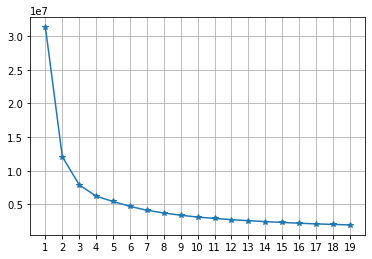

In [123]:
ax = plt.subplot()
ax.plot(list(inertias.keys()), list(inertias.values()), '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [124]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=1996)
y_pred = kmeans.fit_predict(X)

In [125]:
#visualize_cluster_result(X, 0, 1, y_pred, k)

In [126]:
y_pred

array([1, 1, 1, ..., 2, 2, 0], dtype=int32)

In [127]:
clustering_input2['Cluster']=y_pred

In [128]:
clustering_input2

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,economy,enhanced,drama,international,other,...,podcast,quora,referral,samsung,search,tv,vod,youtube,iOS,Cluster
2,26844789,3.0,36.001186,2.0,25.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,29417030,3.0,20.051667,2.0,30.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,26723159,4.0,22.951579,3.0,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,29726122,2.0,20.051667,2.0,61.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,20299962,3.0,34.551230,2.0,23.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,2.0,24.401536,2.0,43.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2
227623,21434712,3.0,28.751405,2.0,38.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
227624,25843074,2.0,27.301448,2.0,49.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
227625,24799085,3.0,31.651317,2.0,45.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [129]:
player_id1=clustering_input2.iloc[:,[0,50]]

#type(player_id1)
player_id1

,subid,Cluster
2,26844789,1
3,29417030,1
4,26723159,1
6,29726122,0
7,20299962,1
...,...,...
227622,25835684,2
227623,21434712,1
227624,25843074,2
227625,24799085,2


In [130]:
output = pd.merge(player_id1, subscribers, on='subid', how='left')
output

,subid,Cluster,Unnamed: 0,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,26844789,1,496617,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
1,29417030,1,356799,base,NaN,drama,replace OTT,20.051667,NaN,30.0,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
2,26723159,1,681701,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
3,29726122,0,192823,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,...,0.3303,ar,Standard Charter,14,True,1,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,True
4,20299962,1,315863,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,...,0.0000,ar,RAKBANK,14,True,1,2020-03-19 14:52:22,2020-07-19 14:52:22,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143862,25835684,2,603751,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,...,0.0000,ar,NaN,14,True,1,2020-01-15 22:43:56,2020-05-15 22:43:56,NaN,True
143863,21434712,1,509326,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,...,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
143864,25843074,2,229587,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,...,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
143865,24799085,2,281340,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,...,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True


In [131]:
#output.to_csv('subscriber_cluster.csv')

output.groupby('Cluster').count()

,subid,Unnamed: 0,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
Cluster,,,,,,,,,,,,,,,,,,,,,
0,40699,40699,40699,25271,40699,40699,40699,25177,40699,40699,...,40699,40699,12470,40699,40699,40699,20257,20539,7296,40699
1,48601,48601,48601,30987,48601,48601,48601,30944,48601,48601,...,48601,48601,10044,48601,48601,48601,36443,37387,4396,48601
2,54567,54567,54567,36539,54567,54567,54567,36454,54567,54567,...,54567,54567,14606,54567,54567,54567,34817,35145,7509,54567


Advertising channel spend efficiency
---------------------


In [132]:
output.describe()

,subid,Cluster,Unnamed: 0,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,join_fee,num_trial_days,payment_period
count,1.438670e+05,143867.000000,143867.000000,92797.000000,143867.000000,92575.000000,143867.00000,143867.0,143867.000000,143867.000000,143867.000000,143867.0,143867.000000
mean,2.499587e+07,1.096395,395276.333065,3.010830,28.066159,2.061053,45.54801,4.0,4.735010,4.515103,0.133133,14.0,0.842452
std,2.881693e+06,0.808018,179617.106327,0.823737,4.914128,0.245400,13.81466,0.0,0.017034,0.023573,0.188898,0.0,0.739934
min,2.000001e+07,0.000000,136.000000,0.000000,2.652191,0.000000,16.00000,4.0,4.000300,3.780100,-0.330300,14.0,0.000000
25%,2.250005e+07,0.000000,262550.000000,2.000000,24.401536,2.000000,35.00000,4.0,4.734300,4.514100,0.036700,14.0,0.000000
50%,2.498562e+07,1.000000,409530.000000,3.000000,27.301448,2.000000,45.00000,4.0,4.734300,4.514100,0.036700,14.0,1.000000
75%,2.749783e+07,2.000000,546767.500000,3.000000,30.201361,2.000000,56.00000,4.0,4.734300,4.514100,0.110100,14.0,1.000000
max,2.999998e+07,2.000000,682885.000000,14.000000,76.599962,7.000000,100.00000,4.0,5.101300,5.027900,0.734000,14.0,3.000000


In [133]:
#data = data[(data['Date'] >=pd.to_datetime('20120701')) & (data['Date'] <= pd.to_datetime('20120831'))]

In [134]:
subscribers['account_creation_date']=pd.to_datetime(subscribers['account_creation_date'])

In [135]:
subscribers=subscribers.drop(columns=['Unnamed: 0'])

In [136]:
#Jul,2019
Jul_2019= subscribers[(subscribers['account_creation_date'] >=pd.to_datetime('20190629')) & (subscribers['account_creation_date'] <= pd.to_datetime('20190731'))]
#Aug,2019
Aug_2019= subscribers[(subscribers['account_creation_date'] >=pd.to_datetime('20190801')) & (subscribers['account_creation_date'] <= pd.to_datetime('20190831'))]
#Sep,2019
Sep_2019= subscribers[(subscribers['account_creation_date'] >=pd.to_datetime('20190901')) & (subscribers['account_creation_date'] <= pd.to_datetime('20190930'))]
#Oct,2019
Oct_2019= subscribers[(subscribers['account_creation_date'] >=pd.to_datetime('20191001')) & (subscribers['account_creation_date'] <= pd.to_datetime('20191031'))]
#Nov,2019
Nov_2019= subscribers[(subscribers['account_creation_date'] >=pd.to_datetime('20191101')) & (subscribers['account_creation_date'] <= pd.to_datetime('20191130'))]
#Dec,2019
Dec_2019= subscribers[(subscribers['account_creation_date'] >=pd.to_datetime('20191201')) & (subscribers['account_creation_date'] <= pd.to_datetime('20191231'))]
#Jan,2020
Jan_2020= subscribers[(subscribers['account_creation_date'] >=pd.to_datetime('20200101')) & (subscribers['account_creation_date'] <= pd.to_datetime('20200131'))]
#Feb,2020
Feb_2020= subscribers[(subscribers['account_creation_date'] >=pd.to_datetime('20200201')) & (subscribers['account_creation_date'] <= pd.to_datetime('20200229'))]
#Mae,2020
Mar_2020= subscribers[(subscribers['account_creation_date'] >=pd.to_datetime('20200301')) & (subscribers['account_creation_date'] <= pd.to_datetime('20200331'))]

In [137]:
Jul_2019

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
10,21191741,NaN,NaN,NaN,expand regional access,34.551230,NaN,53.0,True,UAE,...,0.0367,ar,Standard Charter,14,False,1,2019-07-25 16:00:42,NaN,2019-08-20 00:00:00,True
14,26308559,NaN,NaN,NaN,expand international access,30.201361,NaN,48.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,2019-07-16 00:00:00,False
19,21760199,NaN,NaN,NaN,expand international access,30.201361,NaN,32.0,False,UAE,...,0.0000,ar,NaN,14,False,0,NaN,NaN,NaN,True
23,29576692,NaN,3.0,NaN,expand international access,34.551230,2.0,31.0,False,UAE,...,0.0367,ar,Standard Charter,14,False,0,NaN,NaN,2019-07-21 00:00:00,False
38,25698109,NaN,NaN,NaN,expand regional access,30.201361,NaN,63.0,False,UAE,...,0.0367,ar,Standard Charter,14,False,0,NaN,NaN,2019-07-13 00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227586,23189569,NaN,3.0,NaN,expand international access,28.751405,2.0,28.0,False,UAE,...,0.0367,ar,Najim,14,True,3,2020-03-22 21:41:31,2020-07-22 21:41:31,NaN,True
227597,28985855,NaN,4.0,NaN,expand international access,27.301448,3.0,25.0,False,UAE,...,0.0367,ar,Standard Charter,14,True,3,2020-03-17 23:15:10,2020-07-17 23:15:10,NaN,True
227602,29909208,NaN,2.0,NaN,expand international access,25.851492,2.0,19.0,False,UAE,...,0.0000,ar,RAKBANK,14,False,0,NaN,NaN,NaN,True
227606,25927672,NaN,3.0,NaN,expand regional access,30.201361,2.0,34.0,False,UAE,...,0.0367,ar,Standard Charter,14,False,0,NaN,NaN,NaN,True


In [138]:
subscribers['attribution_technical'].unique()

array(['facebook', 'organic', 'search', 'discovery', 'bing', 'email',
       'brand sem intent google', 'google_organic', 'display',
       'affiliate', 'brand sem intent bing', 'internal', 'pinterest',
       'other', 'youtube', 'facebook_organic', 'referral', 'email_blast',
       'podcast', 'vod', 'samsung', 'ott', 'bing_organic', 'direct_mail',
       'quora', 'appstore', 'criteo', 'pinterest_organic',
       'content_greatist', 'influencer', 'twitter', 'playstore', 'tv'],
      dtype=object)

In [139]:
subscribers['attribution_survey'].unique()

array(['facebook', 'tv', 'youtube', 'search', 'referral', 'public_radio',
       'other', 'podcast', 'pinterest', nan, 'social_organic', 'ott',
       'facebook_organic', 'sirius xm', 'affiliate', 'amfm_radio',
       'direct_mail'], dtype=object)

In [140]:
subscribers.groupby('attribution_technical').count()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
attribution_technical,,,,,,,,,,,,,,,,,,,,,
affiliate,9894,8496,4633,8449,9778,8768,4602,9356,9890,9894,...,9359,9894,3378,9894,9894,9894,5735,6081,1577,9894
appstore,44,40,40,40,40,42,38,44,44,44,...,44,44,30,44,44,44,29,38,0,44
bing,1146,1002,546,994,1135,1139,543,1146,1146,1146,...,1146,1146,449,1146,1146,1146,608,574,211,1146
bing_organic,369,316,262,317,368,368,262,369,369,369,...,369,369,181,369,369,369,147,207,66,369
brand sem intent bing,2231,1916,1319,1896,2198,2194,1313,2211,2231,2231,...,2211,2231,988,2231,2231,2231,1128,1076,387,2231
brand sem intent google,18524,15797,10212,15756,18337,15827,10154,15907,18523,18524,...,15908,18524,8267,18524,18524,18524,10656,10465,3019,18524
content_greatist,5,4,5,4,5,5,5,5,5,5,...,5,5,2,5,5,5,1,1,1,5
criteo,44,25,25,25,44,44,25,44,44,44,...,44,44,17,44,44,44,20,16,15,44
direct_mail,139,136,112,136,136,138,112,139,139,139,...,139,139,73,139,139,139,105,101,11,139


In [141]:
Channel_spend=pd.DataFrame(columns=['bing', 'display', 'facebook','search','youtube'],index=['201907','201908','201909','201910','201911','201912','202001','202002'])

In [142]:
#Jul_2019
attribution_technical = Jul_2019.groupby('attribution_technical')['attribution_technical'].count()
Channel_spend.at['201907','bing']=attribution_technical['bing']+attribution_technical['brand sem intent bing']
Channel_spend.at['201907','display']=attribution_technical['display']
Channel_spend.at['201907','facebook']=attribution_technical['facebook']
Channel_spend.at['201907','search']=attribution_technical['search']+attribution_technical['brand sem intent google']
Channel_spend.at['201907','youtube']=attribution_technical['youtube']
#Aug_2019
attribution_technical = Aug_2019.groupby('attribution_technical')['attribution_technical'].count()
Channel_spend.at['201908','bing']=attribution_technical['bing']+attribution_technical['brand sem intent bing']
Channel_spend.at['201908','display']=attribution_technical['display']
Channel_spend.at['201908','facebook']=attribution_technical['facebook']
Channel_spend.at['201908','search']=attribution_technical['search']+attribution_technical['brand sem intent google']
Channel_spend.at['201908','youtube']=attribution_technical['youtube']
#Sep_2019
attribution_technical = Sep_2019.groupby('attribution_technical')['attribution_technical'].count()
Channel_spend.at['201909','bing']=attribution_technical['bing']+attribution_technical['brand sem intent bing']
Channel_spend.at['201909','display']=attribution_technical['display']
Channel_spend.at['201909','facebook']=attribution_technical['facebook']
Channel_spend.at['201909','search']=attribution_technical['search']+attribution_technical['brand sem intent google']
Channel_spend.at['201909','youtube']=attribution_technical['youtube']
#Oct_2019
attribution_technical = Oct_2019.groupby('attribution_technical')['attribution_technical'].count()
Channel_spend.at['201910','bing']=attribution_technical['bing']+attribution_technical['brand sem intent bing']
Channel_spend.at['201910','display']=attribution_technical['display']
Channel_spend.at['201910','facebook']=attribution_technical['facebook']
Channel_spend.at['201910','search']=attribution_technical['search']+attribution_technical['brand sem intent google']
Channel_spend.at['201910','youtube']=attribution_technical['youtube']
#Nov_2019
attribution_technical = Nov_2019.groupby('attribution_technical')['attribution_technical'].count()
Channel_spend.at['201911','bing']=attribution_technical['bing']+attribution_technical['brand sem intent bing']
Channel_spend.at['201911','display']=attribution_technical['display']
Channel_spend.at['201911','facebook']=attribution_technical['facebook']
Channel_spend.at['201911','search']=attribution_technical['search']+attribution_technical['brand sem intent google']
Channel_spend.at['201911','youtube']=attribution_technical['youtube']
#Dec_2019
attribution_technical = Dec_2019.groupby('attribution_technical')['attribution_technical'].count()
Channel_spend.at['201912','bing']=attribution_technical['bing']+attribution_technical['brand sem intent bing']
Channel_spend.at['201912','display']=attribution_technical['display']
Channel_spend.at['201912','facebook']=attribution_technical['facebook']
Channel_spend.at['201912','search']=attribution_technical['search']+attribution_technical['brand sem intent google']
Channel_spend.at['201912','youtube']=attribution_technical['youtube']
#Jan_2020
attribution_technical = Jan_2020.groupby('attribution_technical')['attribution_technical'].count()
Channel_spend.at['202001','bing']=attribution_technical['bing']+attribution_technical['brand sem intent bing']
Channel_spend.at['202001','display']=attribution_technical['display']
Channel_spend.at['202001','facebook']=attribution_technical['facebook']
Channel_spend.at['202001','search']=attribution_technical['search']+attribution_technical['brand sem intent google']
Channel_spend.at['202001','youtube']=attribution_technical['youtube']
#Feb_2020
attribution_technical = Feb_2020.groupby('attribution_technical')['attribution_technical'].count()
Channel_spend.at['202002','bing']=attribution_technical['bing']+attribution_technical['brand sem intent bing']
Channel_spend.at['202002','display']=attribution_technical['display']
Channel_spend.at['202002','facebook']=attribution_technical['facebook']
Channel_spend.at['202002','search']=attribution_technical['search']+attribution_technical['brand sem intent google']
Channel_spend.at['202002','youtube']=attribution_technical['youtube']

In [143]:
Channel_spend

Channel_spend.to_csv('Channel_spend.csv')


In [144]:
Channel_spend_survey=pd.DataFrame(columns=['facebook','search','youtube'],index=['201907','201908','201909','201910','201911','201912','202001','202002'])

In [145]:
#Jul_2019
attribution_survey = Jul_2019.groupby('attribution_survey')['attribution_survey'].count()
#Channel_spend_survey.at['201907','bing']=attribution_survey['bing']
#Channel_spend_survey.at['201907','display']=attribution_survey['display']
Channel_spend_survey.at['201907','facebook']=attribution_survey['facebook']
Channel_spend_survey.at['201907','search']=attribution_survey['search']
Channel_spend_survey.at['201907','youtube']=attribution_survey['youtube']

In [146]:
subscribers.groupby('attribution_survey').count()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
attribution_survey,,,,,,,,,,,,,,,,,,,,,
affiliate,1962,1760,1071,1754,1949,1919,1061,1960,1960,1962,...,1962,1962,732,1962,1962,1962,1349,1369,244,1962
amfm_radio,337,336,210,331,331,324,210,337,337,337,...,337,337,155,337,337,337,219,259,24,337
direct_mail,408,374,231,374,406,382,230,408,407,408,...,408,408,183,408,408,408,296,279,52,408
facebook,119126,99621,56181,99242,118467,93658,55944,93983,119052,119126,...,94057,119126,45862,119126,119126,119126,64106,59914,22242,119126
facebook_organic,765,765,441,761,761,742,436,763,763,765,...,765,765,295,765,765,765,538,603,52,765
other,6496,5428,3642,5400,6446,6427,3625,6453,6489,6496,...,6460,6496,2375,6496,6496,6496,4586,4431,895,6496
ott,1443,1437,862,1433,1433,1421,857,1439,1439,1443,...,1443,1443,455,1443,1443,1443,1085,1274,63,1443
pinterest,7856,6529,4815,6504,7796,7377,4801,7419,7851,7856,...,7424,7856,2800,7856,7856,7856,5907,5632,944,7856
podcast,2995,2860,2031,2850,2976,2891,2024,2925,2991,2995,...,2929,2995,1278,2995,2995,2995,2278,2452,214,2995


In [147]:
#Jul_2019
attribution_survey = Jul_2019.groupby('attribution_survey')['attribution_survey'].count()
Channel_spend_survey.at['201907','facebook']=attribution_survey['facebook']
Channel_spend_survey.at['201907','search']=attribution_survey['search']
Channel_spend_survey.at['201907','youtube']=attribution_survey['youtube']
#Aug_2019
attribution_survey = Aug_2019.groupby('attribution_survey')['attribution_survey'].count()
Channel_spend_survey.at['201908','facebook']=attribution_survey['facebook']
Channel_spend_survey.at['201908','search']=attribution_survey['search']
Channel_spend_survey.at['201908','youtube']=attribution_survey['youtube']
#Sep_2019
attribution_survey = Sep_2019.groupby('attribution_survey')['attribution_survey'].count()
Channel_spend_survey.at['201909','facebook']=attribution_survey['facebook']
Channel_spend_survey.at['201909','search']=attribution_survey['search']
Channel_spend_survey.at['201909','youtube']=attribution_survey['youtube']
#Oct_2019
attribution_survey = Oct_2019.groupby('attribution_survey')['attribution_survey'].count()
Channel_spend_survey.at['201910','facebook']=attribution_survey['facebook']
Channel_spend_survey.at['201910','search']=attribution_survey['search']
Channel_spend_survey.at['201910','youtube']=attribution_survey['youtube']
#Nov_2019
attribution_survey = Nov_2019.groupby('attribution_survey')['attribution_survey'].count()
Channel_spend_survey.at['201911','facebook']=attribution_survey['facebook']
Channel_spend_survey.at['201911','search']=attribution_survey['search']
Channel_spend_survey.at['201911','youtube']=attribution_survey['youtube']
#Dec_2019
attribution_survey = Dec_2019.groupby('attribution_survey')['attribution_survey'].count()
Channel_spend_survey.at['201912','facebook']=attribution_survey['facebook']
Channel_spend_survey.at['201912','search']=attribution_survey['search']
Channel_spend_survey.at['201912','youtube']=attribution_survey['youtube']
#Jan_2020
attribution_survey = Jan_2020.groupby('attribution_survey')['attribution_survey'].count()
Channel_spend_survey.at['202001','facebook']=attribution_survey['facebook']
Channel_spend_survey.at['202001','search']=attribution_survey['search']
Channel_spend_survey.at['202001','youtube']=attribution_survey['youtube']
#Feb_2020
attribution_survey = Feb_2020.groupby('attribution_survey')['attribution_survey'].count()
Channel_spend_survey.at['202002','facebook']=attribution_survey['facebook']
Channel_spend_survey.at['202002','search']=attribution_survey['search']
Channel_spend_survey.at['202002','youtube']=attribution_survey['youtube']

In [148]:
Channel_spend_survey

Channel_spend_survey.to_csv('Channel_spend_survey.csv')

In [149]:
attribution_technical = subscribers.groupby('attribution_technical')['attribution_technical'].count()

In [150]:
attribution_technical

attribution_technical
affiliate                   9894
appstore                      44
bing                        1146
bing_organic                 369
brand sem intent bing       2231
brand sem intent google    18524
content_greatist               5
criteo                        44
direct_mail                  139
discovery                   2571
display                     1407
email                      25690
email_blast                 7277
facebook                   80251
facebook_organic            3272
google_organic             10691
influencer                    21
internal                    1122
organic                    22013
other                       1786
ott                          158
pinterest                   6065
pinterest_organic             30
playstore                     12
podcast                      985
quora                        100
referral                    5170
samsung                       86
search                     25306
tv                   

Churn
--------

In [151]:
#Remove Error
Right_join= subscribers[-((subscribers['cancel_date'].isnull()==False)&(subscribers['payment_period']==1)&(subscribers['trial_completed']==False))]

In [152]:
Paid=Right_join[Right_join['payment_period'] >= 1]
Unpaid=Right_join[Right_join['payment_period'] <1]

In [153]:
Now= Unpaid[Unpaid['account_creation_date'] > pd.to_datetime('20200313')]
Past= Unpaid[Unpaid['account_creation_date'] <= pd.to_datetime('20200313')]

In [154]:
Cancel1=Now[Now['cancel_date'].isnull()==False]
Cancel2=Past[Past['cancel_date'].isnull()==False]
Undecided=Now[Now['cancel_date'].isnull()==True]
Normal_trail_end=Past[Past['cancel_date'].isnull()==True]

In [155]:
Paid['churn']=0
Cancel1['churn']=2
Cancel2['churn']=2
Undecided['churn']=3
Normal_trail_end['churn']=1

Left_join = pd.concat([Paid, Cancel1,Cancel2,Undecided,Normal_trail_end])

<ipython-input-155-2986f6e93e26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Paid['churn']=0
<ipython-input-155-2986f6e93e26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cancel1['churn']=2
<ipython-input-155-2986f6e93e26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [156]:
Left_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227359 entries, 0 to 227620
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227359 non-null  int64         
 1   package_type                  191871 non-null  object        
 2   num_weekly_services_utilized  117012 non-null  float64       
 3   preferred_genre               191119 non-null  object        
 4   intended_use                  223813 non-null  object        
 5   weekly_consumption_hour       189458 non-null  float64       
 6   num_ideal_streaming_services  115294 non-null  float64       
 7   age                           192216 non-null  float64       
 8   male_TF                       227090 non-null  object        
 9   country                       227359 non-null  object        
 10  attribution_technical         227359 non-null  object        
 11  attribution_s

In [157]:
Left_join_Max=Left_join.iloc[:,[0,19,20,30]]
Left_join_Max

,subid,initial_credit_card_declined,join_fee,churn
0,21724479,False,NaN,0
1,23383224,False,0.3303,0
4,26723159,False,0.0367,0
5,24810928,False,0.3303,0
6,29726122,False,0.3303,0
...,...,...,...,...
227609,22532282,False,NaN,1
227610,26263998,False,0.0367,1
227613,20172551,False,0.0367,1
227614,24317364,False,0.0367,1


In [158]:
Churn_final = pd.merge(Save_for_future, Left_join_Max, on='subid', how='left')
Churn_final=Churn_final[Churn_final['churn'].isnull()==False]
Churn_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143718 entries, 0 to 143866
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         143718 non-null  int64  
 1   package_type                  143718 non-null  object 
 2   num_weekly_services_utilized  143718 non-null  float64
 3   preferred_genre               143718 non-null  object 
 4   intended_use                  143718 non-null  object 
 5   weekly_consumption_hour       143718 non-null  float64
 6   num_ideal_streaming_services  143718 non-null  float64
 7   age                           143718 non-null  float64
 8   male_TF                       143718 non-null  object 
 9   attribution_technical         143718 non-null  object 
 10  op_sys                        143718 non-null  object 
 11  initial_credit_card_declined  143718 non-null  object 
 12  join_fee                      143718 non-nul

In [159]:
Churn_final = pd.get_dummies(Churn_final,drop_first=True)
Churn_final

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,join_fee,churn,package_type_economy,package_type_enhanced,preferred_genre_drama,...,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,op_sys_iOS,initial_credit_card_declined_True
0,26844789,3.0,36.001186,2.0,25.0,0.1101,1.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,29417030,3.0,20.051667,2.0,30.0,0.0367,1.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,26723159,4.0,22.951579,3.0,28.0,0.0367,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,29726122,2.0,20.051667,2.0,61.0,0.3303,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20299962,3.0,34.551230,2.0,23.0,0.0000,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143862,25835684,2.0,24.401536,2.0,43.0,0.0000,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
143863,21434712,3.0,28.751405,2.0,38.0,0.3303,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
143864,25843074,2.0,27.301448,2.0,49.0,0.3303,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
143865,24799085,3.0,31.651317,2.0,45.0,0.0367,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [160]:
Churn_ultimate=Churn_final[Churn_final['churn']<= 1]
Churn_ultimate

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,join_fee,churn,package_type_economy,package_type_enhanced,preferred_genre_drama,...,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,op_sys_iOS,initial_credit_card_declined_True
0,26844789,3.0,36.001186,2.0,25.0,0.1101,1.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,29417030,3.0,20.051667,2.0,30.0,0.0367,1.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,26723159,4.0,22.951579,3.0,28.0,0.0367,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,29726122,2.0,20.051667,2.0,61.0,0.3303,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20299962,3.0,34.551230,2.0,23.0,0.0000,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143861,25549852,3.0,28.751405,2.0,61.0,0.3303,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
143862,25835684,2.0,24.401536,2.0,43.0,0.0000,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
143863,21434712,3.0,28.751405,2.0,38.0,0.3303,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
143864,25843074,2.0,27.301448,2.0,49.0,0.3303,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [161]:
#Churn_ultimate['y']=Churn_ultimate['churn']

In [162]:
#Churn_ultimate.drop(columns=['churn'])

In [163]:
feature_x = [tag for tag in Churn_ultimate.columns if tag not in ['subid','churn']]
feature_y = [tag for tag in Churn_ultimate.columns if tag in ['churn']]
print('feature:\n', feature_x)
print('feature:\n', feature_y)

X = Churn_ultimate[feature_x].values
Y = Churn_ultimate[feature_y].values

feature:
 ['num_weekly_services_utilized', 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'join_fee', 'package_type_economy', 'package_type_enhanced', 'preferred_genre_drama', 'preferred_genre_international', 'preferred_genre_other', 'preferred_genre_regional', 'intended_use_education', 'intended_use_expand international access', 'intended_use_expand regional access', 'intended_use_other', 'intended_use_replace OTT', 'intended_use_supplement OTT', 'male_TF_True', 'attribution_technical_appstore', 'attribution_technical_bing', 'attribution_technical_bing_organic', 'attribution_technical_brand sem intent bing', 'attribution_technical_brand sem intent google', 'attribution_technical_content_greatist', 'attribution_technical_criteo', 'attribution_technical_direct_mail', 'attribution_technical_discovery', 'attribution_technical_display', 'attribution_technical_email', 'attribution_technical_email_blast', 'attribution_technical_facebook', 'attribution_technical_facebook_or

In [164]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split

In [165]:
#!pip install sklearn

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1998)

In [167]:
#划分训练集和测试集
#from sklearn.model_selection import train_test_split
#train, vali = train_test_split(Churn_ultimate, test_size=0.2)

In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [169]:
logreg = linear_model.LogisticRegression(max_iter=100,penalty='l2', dual=False, tol=0.01, C=1, fit_intercept=True)
logreg.fit(X_train, Y_train)

/Users/tianrui/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/tianrui/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, tol=0.01)

In [170]:
prepro = logreg.predict_proba(X_test_std)
acc = logreg.score(X_test_std,Y_test)

In [171]:
acc

0.6917713448547166

In [172]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   age                           192459 non-null  float64       
 8   male_TF                       227359 non-null  object        
 9   country                       227628 non-null  object        
 10  attribution_technical         227628 non-null  object        
 11  attribution_s

In [173]:
subscribers.groupby('payment_period').count()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,last_payment,next_payment,cancel_date,trial_completed
payment_period,,,,,,,,,,,,,,,,,,,,,
0,95391,68990,50571,68512,93150,83031,49504,84689,95279,95391,...,95391,84798,95391,37857,95391,95391,0,8850,27141,95391
1,86968,83163,42841,82873,86044,69794,42398,70505,86812,86968,...,86968,70660,86968,35728,86968,86968,86968,76785,9098,86968
2,42921,39706,21879,39720,42609,34620,21719,34944,42920,42921,...,42921,34945,42921,17427,42921,42921,42921,42267,592,42921
3,2348,195,1887,197,2276,2253,1837,2321,2348,2348,...,2348,2321,2348,1038,2348,2348,2348,2348,0,2348


In [174]:
subscribers['next_payment']=pd.to_datetime(subscribers['next_payment'])

In [175]:
Pass_On= subscribers[subscribers['next_payment'] > pd.to_datetime('20200327')]

In [176]:
Pass_On.groupby('payment_period').count()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,last_payment,next_payment,cancel_date,trial_completed
payment_period,,,,,,,,,,,,,,,,,,,,,
0,8850,8427,4579,8432,8415,7137,4317,7579,8785,8850,...,8850,7641,8850,3600,8850,8850,0,8850,896,8850
1,76785,76355,37511,76061,76039,61153,37168,61711,76629,76785,...,76785,61866,76785,31782,76785,76785,76785,76785,0,76785
2,42267,39685,21430,39699,41980,33992,21288,34291,42266,42267,...,42267,34292,42267,17166,42267,42267,42267,42267,0,42267
3,2348,195,1887,197,2276,2253,1837,2321,2348,2348,...,2348,2321,2348,1038,2348,2348,2348,2348,0,2348


In [177]:
pp1=subscribers[subscribers['payment_period']==1]
pp2=subscribers[subscribers['payment_period']==2]
pp3=subscribers[subscribers['payment_period']==3]
pp0=subscribers[subscribers['payment_period']==0]

In [178]:
#pp1.to_csv('pp1.csv')

In [179]:
#pp2.to_csv('pp2.csv')

In [180]:
#pp3.to_csv('pp3.csv')

In [181]:
subscribers=subscribers[subscribers['age']<=100]

In [191]:
subscribers.groupby('current_sub_TF').mean()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,payment_period,last_payment,next_payment,cancel_date,trial_completed
current_sub_TF,,,,,,,,,,,,,,,,,,,,,
False,86104,56282,51570,55808,84108,84716,50651,86104,86104,86104,...,86104,86104,86104,27532,86104,86104,9400,0,31719,86104
True,105467,99928,65192,99656,103961,104100,64395,105467,105463,105467,...,105467,105467,105467,29177,105467,105467,97888,105467,808,105467


In [194]:
Shot= subscribers.groupby('current_sub_TF').mean()

In [187]:
#subscribers.info()

In [195]:
print(Shot)

                 subid  package_type  num_weekly_services_utilized  \
current_sub_TF                                                       
False            86104         56282                         51570   
True            105467         99928                         65192   

                preferred_genre  intended_use  weekly_consumption_hour  \
current_sub_TF                                                           
False                     55808         84108                    84716   
True                      99656        103961                   104100   

                num_ideal_streaming_services     age  male_TF  country  ...  \
current_sub_TF                                                          ...   
False                                  50651   86104    86104    86104  ...   
True                                   64395  105467   105463   105467  ...   

                initial_credit_card_declined  join_fee  language  \
current_sub_TF                       